In [1]:
## Import basic Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# pd.options.display.max_rows
# pd.set_option('display.max_rows', None)

In [3]:
## Importing the cleaned data
df = pd.read_csv("cleaned_salary_data.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python_skill,spark_skill,aws_skill,excel_skill
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,72.0,NM,0,49,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,87.5,MD,0,38,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,80,90,85.0,FL,1,12,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,97,76.5,WA,1,57,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,86,143,114.5,NY,1,24,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'company_age', 'python_skill', 'spark_skill',
       'aws_skill', 'excel_skill'],
      dtype='object')

In [5]:
## We still need to simplify few columns like there are different kind of data scientists let's keep them by name data scientist
def job_title(row):
    if 'data scientist' in row.lower():
        return 'data scientist'
    elif 'data engineer' in row.lower():
        return 'data engineer'
    elif 'data analyst' in row.lower():
        return 'data analyst'
    elif 'machiner learning' in row.lower():
        return 'machine learning engineer'
    elif 'manager' in row.lower():
        return 'manager'
    elif 'director' in row.lower():
        return 'director'
    else:
        return 'na'
df['job_simplified'] = df['Job Title'].apply(job_title)

In [6]:
df.job_simplified.value_counts()

data scientist    279
na                209
data engineer     119
data analyst       99
manager            22
director           14
Name: job_simplified, dtype: int64

In [7]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [9]:
df['job_state'].value_counts()

CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
WA              21
NC              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
AZ               9
MO               9
AL               8
GA               6
KY               6
DE               6
MI               6
CT               5
IA               5
LA               4
OR               4
NE               4
NM               3
KS               3
ID               2
MN               2
Los Angeles      1
RI               1
SC               1
Name: job_state, dtype: int64

In [10]:
# Fix Los Angeles in this column
df['job_state'] = df['job_state'].apply(lambda x: x.strip().replace('Los Angeles','CA'))

In [11]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [12]:
# Job Description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,company_age,python_skill,spark_skill,aws_skill,excel_skill,job_simplified,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,49,1,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,38,1,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,12,1,1,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,57,1,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,24,1,0,0,1,data scientist,na,2728


In [13]:
## Competitors COunt
df['no_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['no_competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: no_competitors, Length: 742, dtype: int64

In [15]:
## Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [16]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [17]:
df[df['hourly']==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [18]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,company_age,python_skill,spark_skill,aws_skill,excel_skill,desc_len,no_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


Visualization

<AxesSubplot:xlabel='Rating', ylabel='Count'>

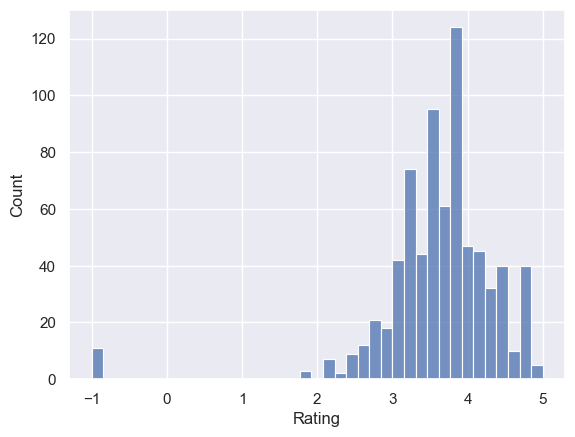

In [19]:
sns.histplot(df['Rating'])

<AxesSubplot:xlabel='avg_salary', ylabel='Count'>

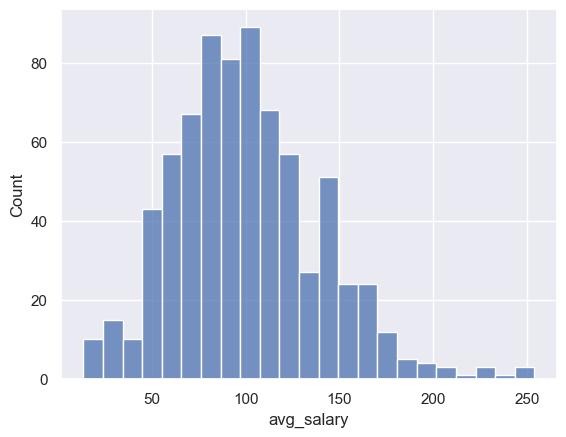

In [20]:
sns.histplot(df['avg_salary'])

<AxesSubplot:xlabel='company_age', ylabel='Count'>

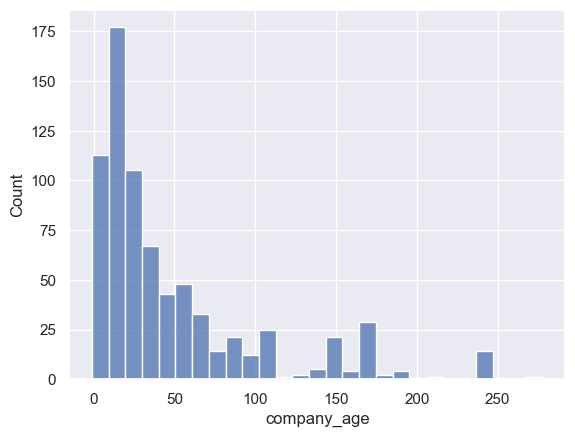

In [21]:
sns.histplot(df['company_age'])

<AxesSubplot:xlabel='desc_len', ylabel='Count'>

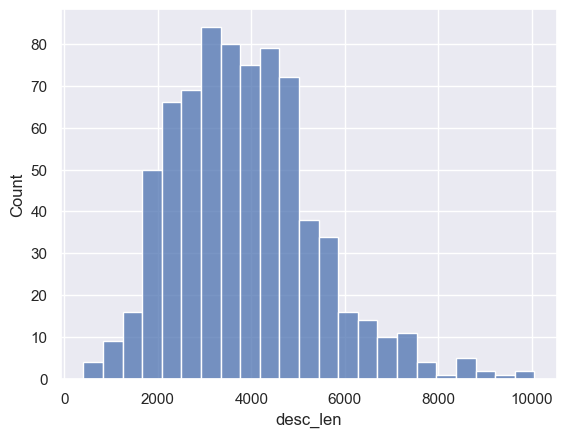

In [22]:
sns.histplot(df['desc_len'])

<AxesSubplot:xlabel='no_competitors', ylabel='Count'>

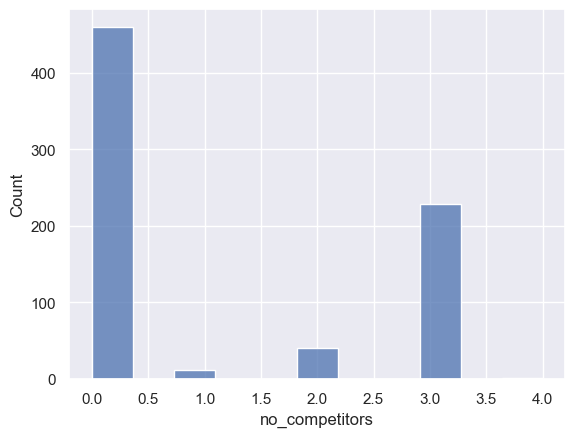

In [23]:
sns.histplot(x='no_competitors',data=df)

Box Plot to check the outliers

<AxesSubplot:xlabel='avg_salary'>

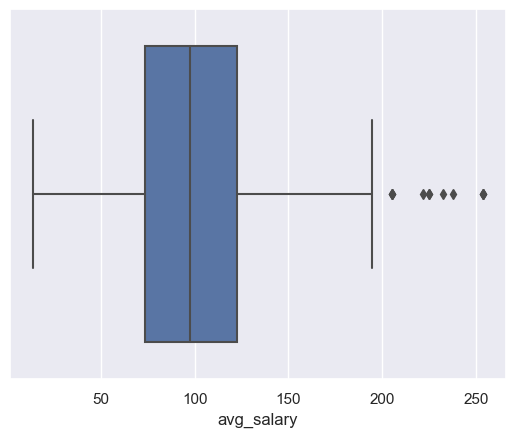

In [24]:
sns.boxplot(x= 'avg_salary', data=df)

<AxesSubplot:xlabel='Rating'>

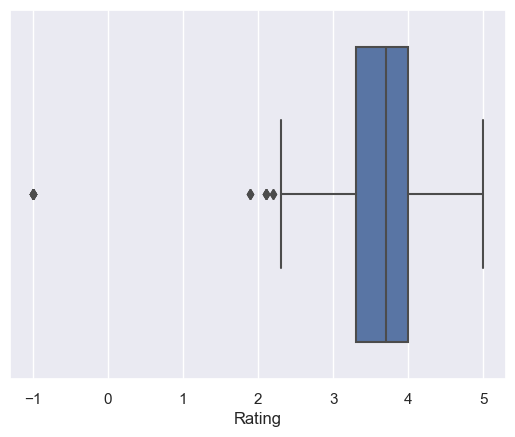

In [25]:
sns.boxplot(x='Rating',data=df)

<AxesSubplot:xlabel='company_age'>

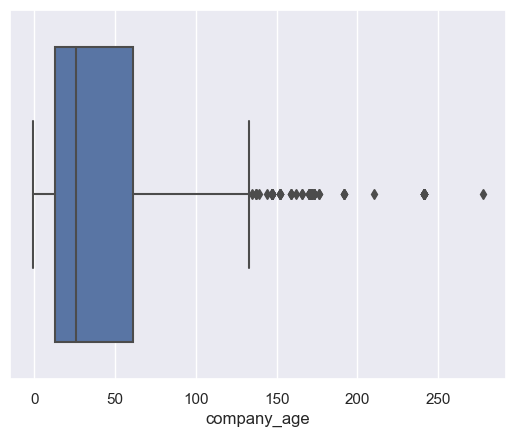

In [26]:
sns.boxplot(x='company_age',data=df)

Correlation b/w continuous vairables

In [27]:
c = df[['company_age','avg_salary','Rating','desc_len','no_competitors']].corr()
c

,company_age,avg_salary,Rating,desc_len,no_competitors
company_age,1.000000,0.019492,0.024665,0.164461,0.128272
avg_salary,0.019492,1.000000,0.013492,0.078808,0.093813
Rating,0.024665,0.013492,1.000000,-0.012281,0.027190
desc_len,0.164461,0.078808,-0.012281,1.000000,0.104620
no_competitors,0.128272,0.093813,0.027190,0.104620,1.000000


<AxesSubplot:>

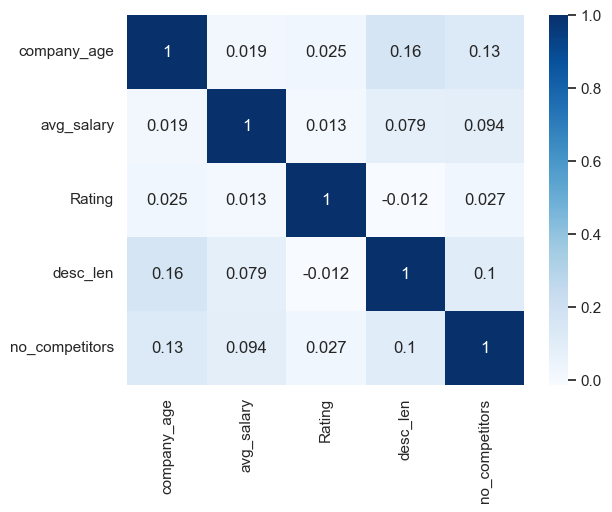

In [28]:
sns.heatmap(c,annot=True,cmap='Blues')

Categorical features visualization

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'company_age', 'python_skill', 'spark_skill',
       'aws_skill', 'excel_skill', 'job_simplified', 'seniority', 'desc_len',
       'no_competitors'],
      dtype='object')

In [30]:
cat_colms = df[['Company Name','Location', 'Headquarters', 'Size','Type of ownership', 
            'Industry', 'Sector', 'Revenue','job_state','same_state','python_skill', 
            'spark_skill','aws_skill', 'excel_skill', 'job_simplified', 'seniority']]

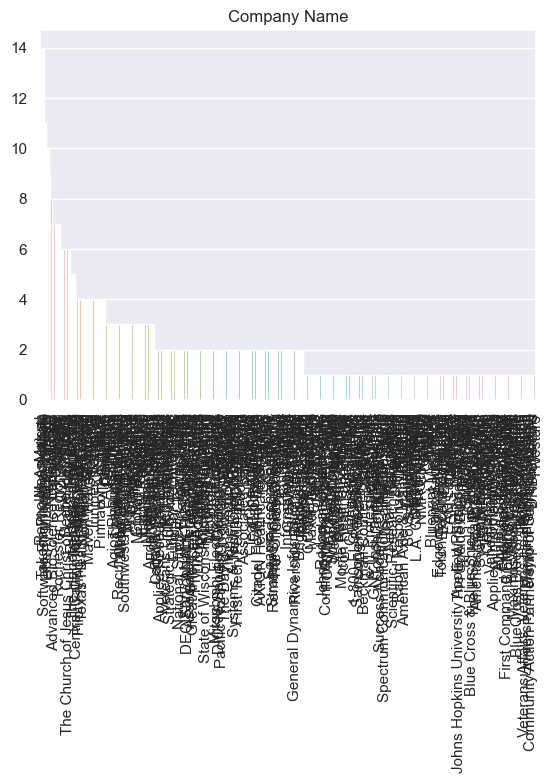

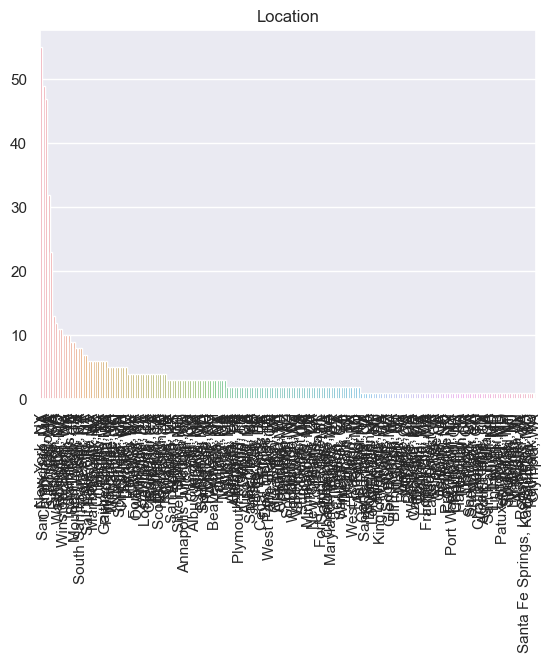

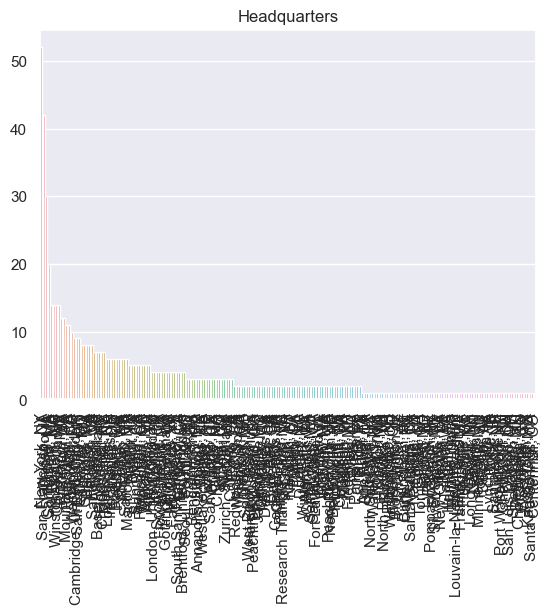

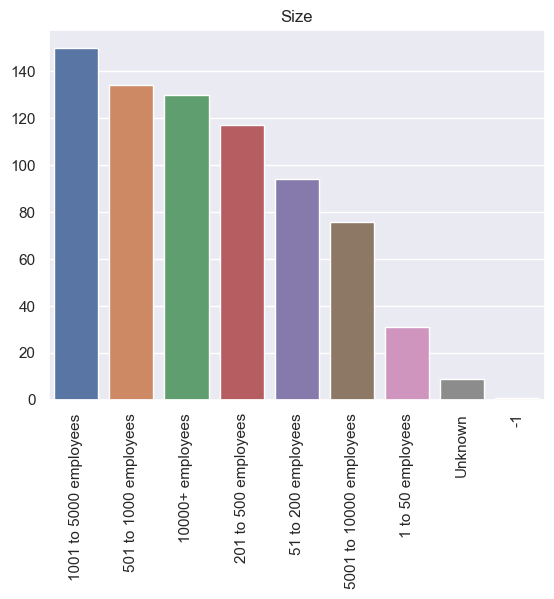

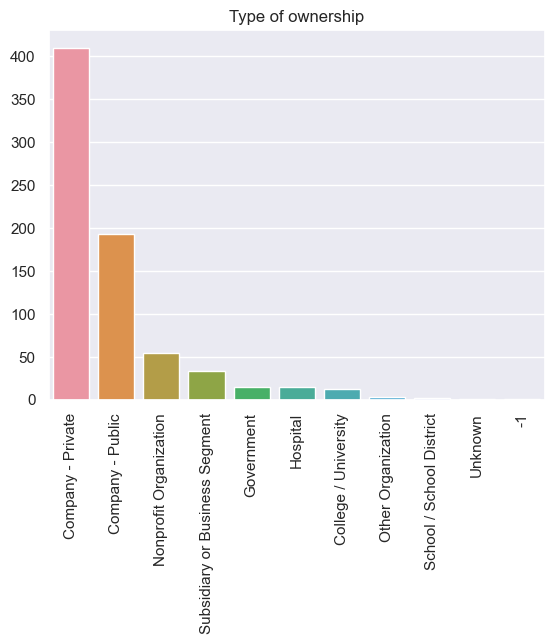

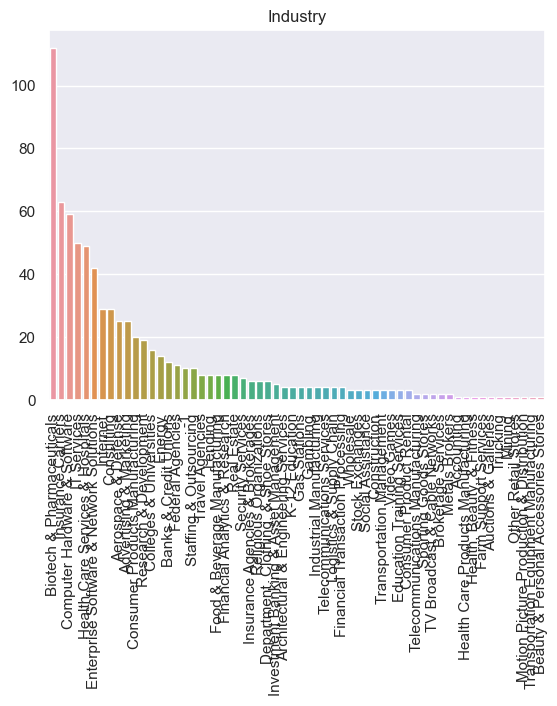

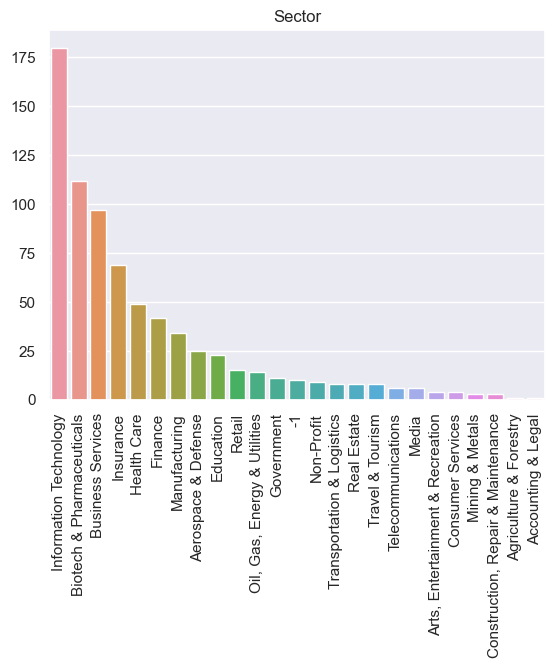

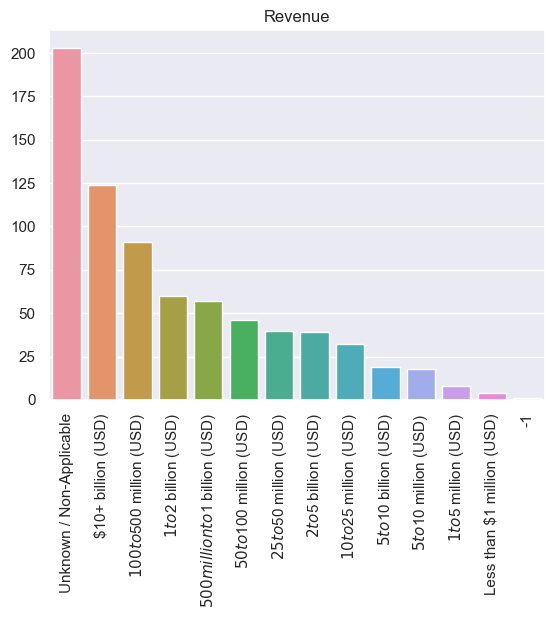

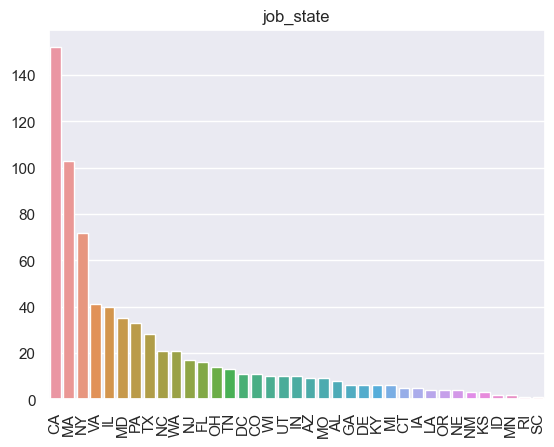

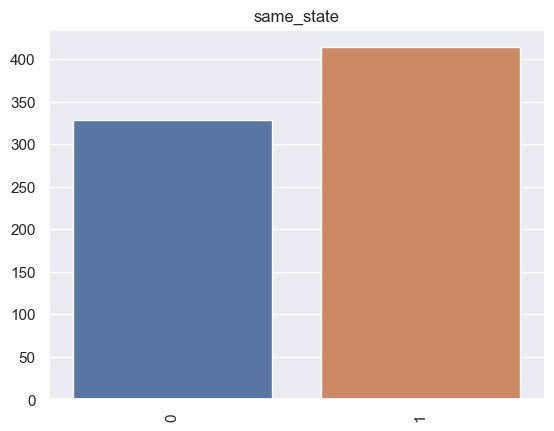

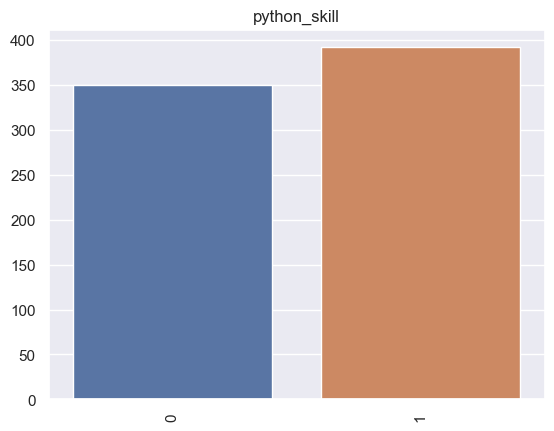

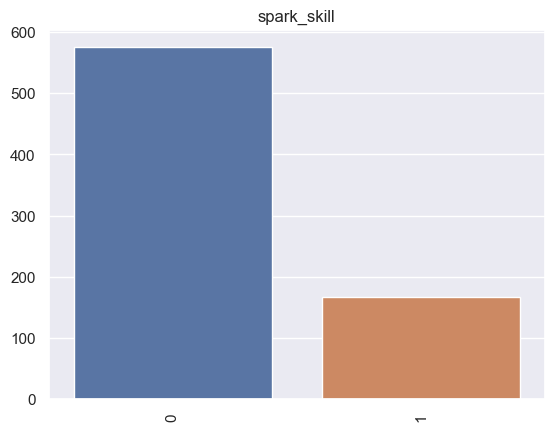

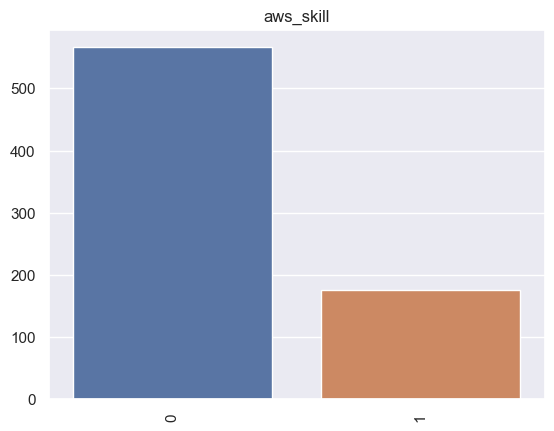

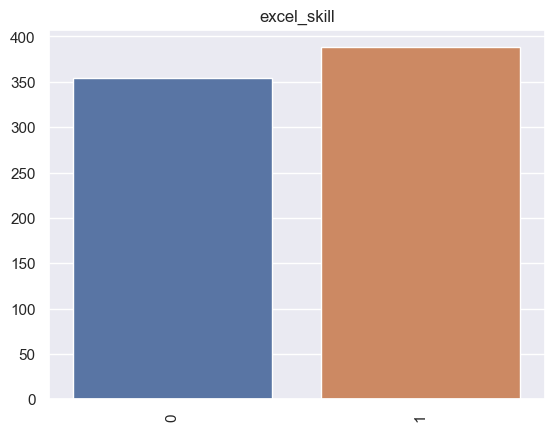

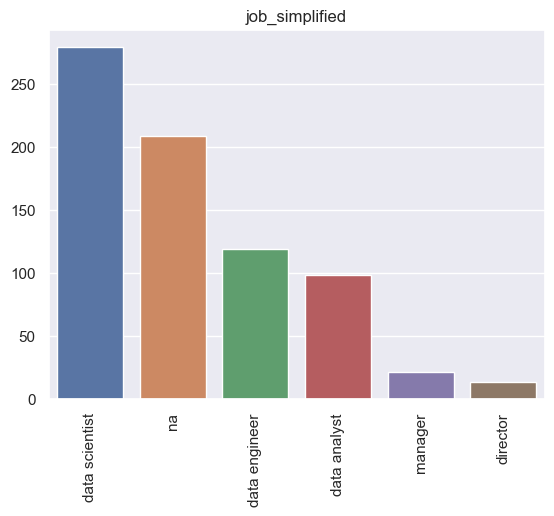

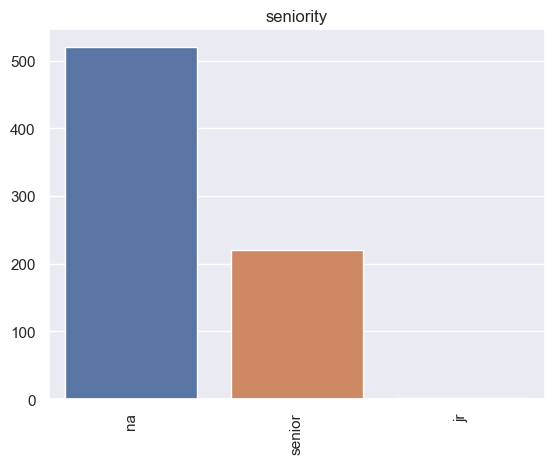

In [31]:
for i in cat_colms.columns:
    index = cat_colms[i].value_counts().index
    values = cat_colms[i].value_counts().values
    plt.title(i)
    sns.barplot(x=index,y=values)
    plt.xticks(rotation=90)
    plt.show()

SO we have somes columns with alot of values. SO let's visualize top 15

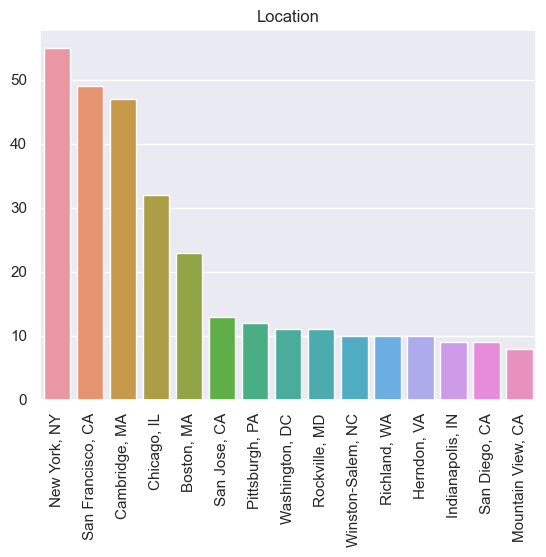

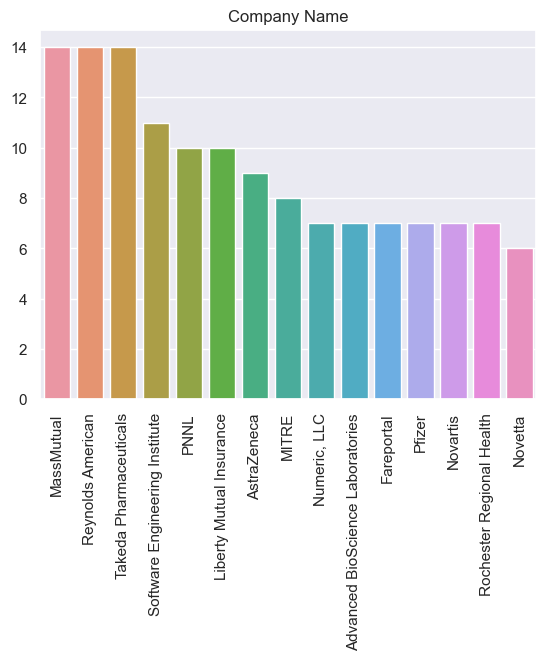

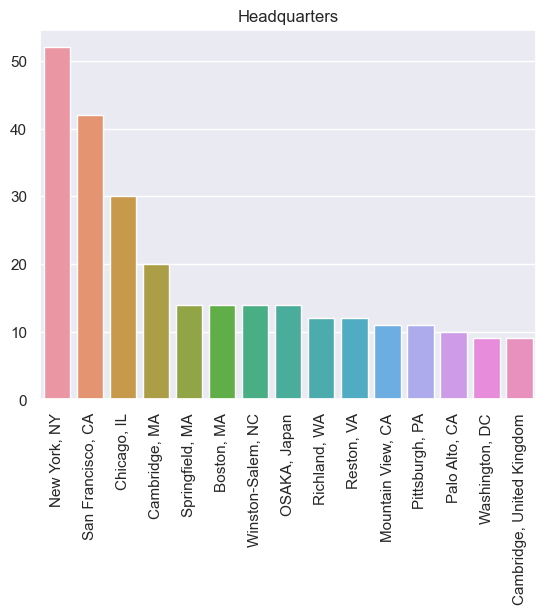

In [32]:
for i in cat_colms[['Location','Company Name','Headquarters']].columns:
    index = cat_colms[i].value_counts().index[:15]
    values = cat_colms[i].value_counts().values[:15]
    plt.title(i)
    sns.barplot(x=index,y=values)
    plt.xticks(rotation=90)
    plt.show()

Pivot Tables

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'company_age', 'python_skill', 'spark_skill',
       'aws_skill', 'excel_skill', 'job_simplified', 'seniority', 'desc_len',
       'no_competitors'],
      dtype='object')

In [34]:
pd.pivot_table(df,index='job_simplified',values='avg_salary')

,avg_salary
job_simplified,
data analyst,64.621212
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
na,89.543062


In [35]:
pd.pivot_table(df,index=['job_simplified','seniority'],values='avg_salary')

avg_salary
job_simplified seniority            
data analyst   jr          56.500000
               na          60.812500
               senior      75.480769
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
na             na          78.684028
               senior     113.600000

In [36]:
pd.pivot_table(df,index='job_state',values='avg_salary').sort_values(by='avg_salary',ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [37]:
pd.pivot_table(df,index=['job_state','job_simplified'],values='avg_salary').sort_values(by='job_state',ascending=False)

avg_salary
job_state job_simplified            
WI        na               54.000000
          data scientist  113.500000
          data analyst     58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        data analyst     55.000000
          na              124.500000
AL        na               51.833333
          data engineer    65.000000
          data analyst     60.750000

[108 rows x 1 columns]

In [38]:
## Only check the data scientist salary based on state
pd.pivot_table(df[df['job_simplified']=='data scientist'],index='job_state',values='avg_salary').sort_values(by='avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'company_age', 'python_skill', 'spark_skill',
       'aws_skill', 'excel_skill', 'job_simplified', 'seniority', 'desc_len',
       'no_competitors'],
      dtype='object')

In [40]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [41]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'no_competitors', 'hourly', 'employer_provided', 'python_skill', 'spark_skill', 'aws_skill', 'excel_skill', 'Type of ownership','avg_salary']]

In [42]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary'))

Rating
        avg_salary
Rating            
-1.0    136.181818
 1.9     87.500000
 2.1     95.900000
 2.2     97.750000
 2.3     81.500000
 2.4     60.214286
 2.5    120.000000
 2.6    109.083333
 2.7     83.250000
 2.8     83.928571
 2.9     81.138889
 3.0     85.588235
 3.1     86.580000
 3.2    105.500000
 3.3    101.858974
 3.4     93.011364
 3.5    104.897959
 3.6     85.467391
 3.7    104.131148
 3.8     96.811475
 3.9    113.071429
 4.0    105.340426
 4.1    116.368421
 4.2    100.442308
 4.3    102.468750
 4.4    108.606061
 4.5    117.714286
 4.6     97.250000
 4.7    103.983871
 4.8     80.277778
 5.0    134.700000
Industry
                                          avg_salary
Industry                                            
-1                                        114.650000
Accounting                                113.500000
Advertising & Marketing                   104.300000
Aerospace & Defense                        99.060000
Architectural & Engineering Services   

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [44]:
##Based on Python
pd.pivot_table(df_pivots, index='Revenue',columns='python_skill',values='avg_salary')

python_skill,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),80.875000,119.843750
$10+ billion (USD),102.393939,129.698276
$100 to $500 million (USD),67.319149,100.068182
$2 to $5 billion (USD),79.000000,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


<AxesSubplot:xlabel='Revenue'>

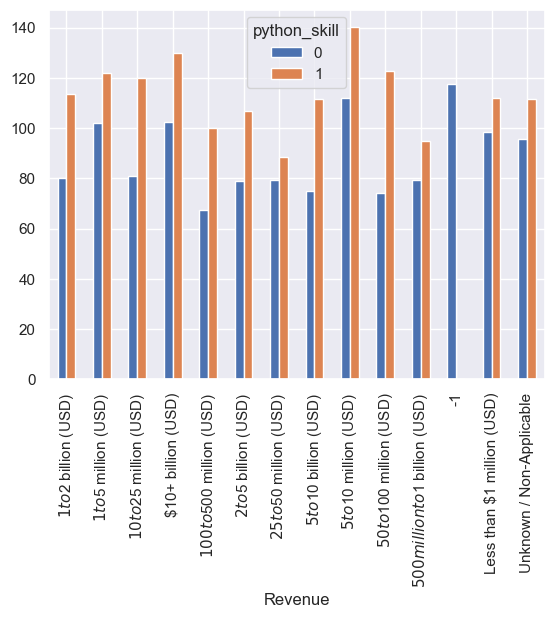

In [45]:
pd.pivot_table(df_pivots, index='Revenue',columns='python_skill',values='avg_salary').plot(kind='bar')

In [46]:
pd.pivot_table(df_pivots, index='Revenue',columns='python_skill',values='avg_salary',aggfunc='count')

python_skill,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [48]:
df.to_csv('salary_data_cleaned2.csv',index=False)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mtayy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

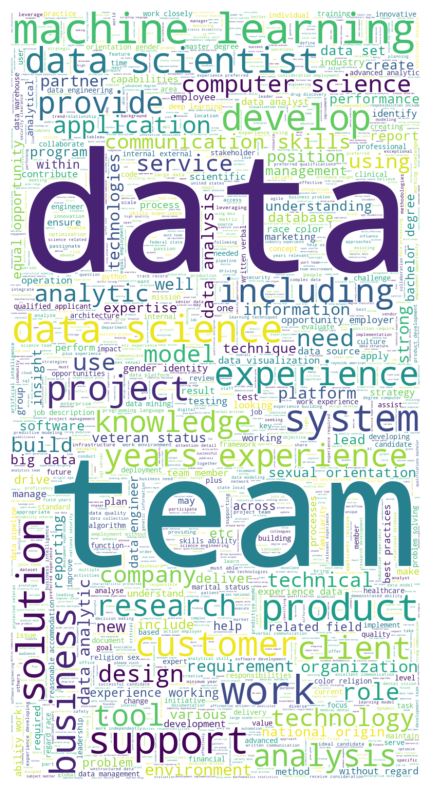

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()